In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import MESS
import numpy as np
import pandas as pd

from collections import OrderedDict
from itertools import combinations
from scipy.stats import spearmanr

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Generate a small fake community dataset including pi, dxy, abund, & traits

In [3]:
pis = np.random.random(10)/10
dxys = np.random.random(10)/10
abunds = np.random.randint(1, 100, 10)
trts = np.random.random(10)*10

dat = pd.DataFrame([], columns=["pi", "dxy", "abundance", "trait"])
dat["pi"] = pis
dat["dxy"] = dxys
dat["abundance"] = abunds
dat["trait"] = trts
display(dat)
print(np.mean(dat["pi"]))

,pi,dxy,abundance,trait
0,0.066124,0.074111,8,0.185415
1,0.012453,0.037473,30,0.057128
2,0.057139,0.057638,38,0.297253
3,0.088717,0.003544,64,1.981273
4,0.055737,0.028951,67,2.523354
5,0.098679,0.037067,71,5.835256
6,0.039732,0.062204,20,9.482491
7,0.060277,0.019458,62,4.047420
8,0.065151,0.079931,10,6.109432
9,0.001932,0.011662,3,3.510000


0.054594088125007476


## Correlations between datatypes


In [4]:
for pair in combinations(dat.columns, r=2):
    print(pair, spearmanr(dat[pair[0]], dat[pair[1]])[0])

(('pi', 'dxy'), 0.06666666666666665)
(('pi', 'abundance'), 0.4545454545454545)
(('pi', 'trait'), 0.09090909090909088)
(('dxy', 'abundance'), -0.406060606060606)
(('dxy', 'trait'), 0.11515151515151514)
(('abundance', 'trait'), 0.04242424242424241)


## Calculate generalized hill numbers for abundance and pi for the test data

In [11]:
np.array(np.ones(10))
for p in ["abundance", "pi"]:
    if p == "abundance":
        vals = None
    else:
        vals = dat[p]
    for i in range(0, 5):
        hval = MESS.stats.generalized_hill_number(abunds=dat["abundance"], vals=vals, order=i)
        print(p, i, hval)
for i in range(0, 5):
    hval = MESS.stats.trait_hill_number(abunds=dat["abundance"], traits=dat["trait"], order=i)
    print("trait", i, hval)
traits = pd.DataFrame([1.5])
MESS.stats.trait_hill_number(abunds=pd.DataFrame([100]), traits=traits)
from sklearn.metrics import pairwise_distances
traits = traits.values.reshape(-1, 1)
print(traits)
pairwise_distances(traits)

('abundance', 0, 0.02680965147453083)
('abundance', 1, 0.020523241887415097)
('abundance', 2, 0.01829597292392211)
('abundance', 3, 0.017270410886360606)
('abundance', 4, 0.016693114101585506)
('pi', 0, 0.022119496006088184)
('pi', 1, 0.01828988845523972)
('pi', 2, 0.01686920857774611)
('pi', 3, 0.01623919273621736)
('pi', 4, 0.01589464371780899)
('trait', 0, 10.965485946779129)
('trait', 1, 8.561483809888323)
('trait', 2, 7.507472667546)
('trait', 3, 6.945980372494117)
('trait', 4, 6.608012875040912)
[[1.5]]


array([[0.]])

## How do even vs uneven abundances interact with even and uneven pi distributions in the generalized hill framework?

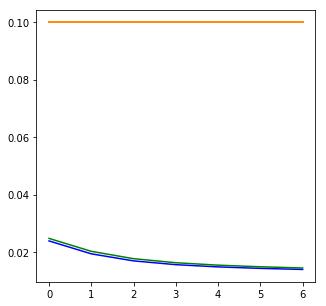

In [34]:
watdo = MESS.stats.generalized_hill_number
fig, ax = plt.subplots(figsize=(5, 5))
xs = list(range(0,7))

## Rand abund even pi
abunds = dat["abundance"]
even_pi = np.array([0.04] * 10)
ys = [watdo(abunds, even_pi, i) for i in xs]
ax.plot(xs, ys, c='b')

## Even abund even pi
abunds = np.array([10] * 10)
even_pi = np.array([0.04] * 10)
ys = [watdo(abunds, even_pi, i) for i in xs]
ax.plot(xs, ys, c='r')
#vals = np.ones(len(dat["abundance"]))

## Rand abund rand pi
abunds = dat["abundance"]
vals = dat["pi"]
ys = [watdo(abunds, vals, i) for i in xs]
ax.plot(xs, ys, c='g')

## even abund rand pi
abunds = np.array([10] * 10)
vals = dat["pi"]
ys = [watdo(abunds, vals, i) for i in xs]
ax.plot(xs, ys, c='orange')


## Formulate hill # for traits

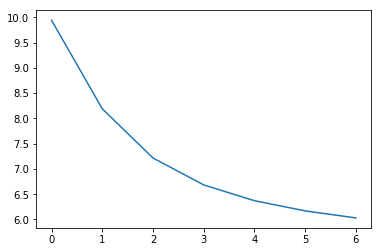

In [50]:
xs = list(range(0,7))
ys = [MESS.stats.trait_hill_number(abunds=dat["abundance"], traits=dat["trait"], order=i) for i in xs]
plt.plot(xs, ys)

In [139]:
MESS.stats.calculate_sumstats(dat, verbose=True)
#MESS.stats.trait_hill_number(dat["abundance"], dat["trait"], order=2)

,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,SGD_0_0,SGD_0_1,SGD_0_2,SGD_0_3,SGD_0_4,SGD_0_5,SGD_0_6,SGD_0_7,SGD_0_8,SGD_0_9,SGD_1_0,SGD_1_1,SGD_1_2,SGD_1_3,SGD_1_4,SGD_1_5,SGD_1_6,SGD_1_7,SGD_1_8,SGD_1_9,SGD_2_0,SGD_2_1,SGD_2_2,SGD_2_3,SGD_2_4,SGD_2_5,SGD_2_6,SGD_2_7,SGD_2_8,SGD_2_9,SGD_3_0,SGD_3_1,SGD_3_2,SGD_3_3,SGD_3_4,SGD_3_5,SGD_3_6,SGD_3_7,SGD_3_8,SGD_3_9,SGD_4_0,SGD_4_1,SGD_4_2,SGD_4_3,SGD_4_4,SGD_4_5,SGD_4_6,SGD_4_7,SGD_4_8,SGD_4_9,SGD_5_0,SGD_5_1,SGD_5_2,SGD_5_3,SGD_5_4,SGD_5_5,SGD_5_6,SGD_5_7,SGD_5_8,SGD_5_9,SGD_6_0,SGD_6_1,SGD_6_2,SGD_6_3,SGD_6_4,SGD_6_5,SGD_6_6,SGD_6_7,SGD_6_8,SGD_6_9,SGD_7_0,SGD_7_1,SGD_7_2,SGD_7_3,SGD_7_4,SGD_7_5,SGD_7_6,SGD_7_7,SGD_7_8,SGD_7_9,SGD_8_0,SGD_8_1,SGD_8_2,SGD_8_3,SGD_8_4,SGD_8_5,SGD_8_6,SGD_8_7,SGD_8_8,SGD_8_9,SGD_9_0,SGD_9_1,SGD_9_2,SGD_9_3,SGD_9_4,SGD_9_5,SGD_9_6,SGD_9_7,SGD_9_8,SGD_9_9
0,10,8.872514,8.145481,7.700179,7.420443,9.71417,9.462063,9.237746,9.037019,0.068864,0.01642,0.09466,-0.305519,0.067275,0.014651,0.042062,0.026234,0.803644,-0.497363,0.03073,0.031437,0,100.423139,85.355121,74.775966,67.406337,6.246994,2.918646,-0.383132,-1.267396,6.895062,4.923683,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Trash below here

In [75]:
df = pd.read_csv("/home/isaac/Continuosity/MESS/analysis/figure3-sims/badsims.txt", sep="\t", header=0)
np.abs([-1, 1])

array([1, 1])

# Weevil data

,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,26,15.551964,11.553471,9.749593,8.776689,16.525113,13.293617,11.35714,10.189882,0.022862,0.022351,1.469762,1.797334,0.020936,0.019995,0,10,2,6,4,1,0,1,0,1,1


,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,27,12.342967,8.390983,7.234338,6.756258,17.708787,14.927681,13.310007,12.280974,0.025299,0.022751,0.947168,0.086781,0.019174,0.028364,0,7,4,3,3,4,2,1,0,0,3


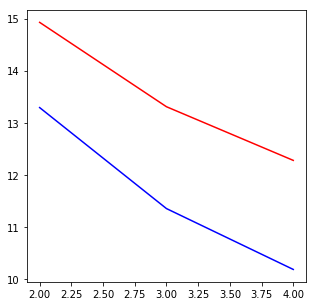

In [32]:
m_df = pd.read_csv("/home/isaac/SGD_empirical/empirical_weevils/mauritius.dat", header=0)
r_df = pd.read_csv("/home/isaac/SGD_empirical/empirical_weevils/reunion.dat", header=0)
m_ss = MESS.stats.calculate_sumstats(m_df)
r_ss = MESS.stats.calculate_sumstats(r_df)

display(m_ss)
display(r_ss)

fig, ax = plt.subplots(figsize=(5, 5))
xs = range(2, 5)
ys = [m_ss["pi_h{}".format(i)] for i in xs]
ax.plot(xs, ys, c='b')
ys = [r_ss["pi_h{}".format(i)] for i in xs]
ax.plot(xs, ys, c='r')

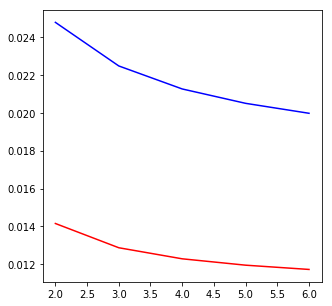

In [35]:
watdo(m_df["abundance"], m_df["pi"])/len(m_df)
fig, ax = plt.subplots(figsize=(5, 5))
xs = range(2, 7)
ys = [watdo(m_df["abundance"], m_df["pi"], i) for i in xs]
ax.plot(xs, ys, c='b')
ys = [watdo(r_df["abundance"], r_df["pi"], i) for i in xs]
ax.plot(xs, ys, c='r')

In [74]:
print(len(m_df), spearmanr(m_df["abundance"], m_df["pi"]))
print(len(r_df), spearmanr(r_df["abundance"], r_df["pi"]))
res = spearmanr([2] * 26, m_df["abundance"])[0]
np.isnan(res)

(26, SpearmanrResult(correlation=0.5036941254918288, pvalue=0.008706277317942965))
(27, SpearmanrResult(correlation=0.6380779590471193, pvalue=0.000342443669086618))


True

# Random MESS janks

(array([ 5.,  2.,  6.,  3.,  2.,  9., 11.,  9.,  6.,  4.,  5.,  7.,  4.,
         3.,  4.,  3.,  6.,  7.,  2.,  2.]),
 array([0.0001   , 0.0001445, 0.000189 , 0.0002335, 0.000278 , 0.0003225,
        0.000367 , 0.0004115, 0.000456 , 0.0005005, 0.000545 , 0.0005895,
        0.000634 , 0.0006785, 0.000723 , 0.0007675, 0.000812 , 0.0008565,
        0.000901 , 0.0009455, 0.00099  ]),
 <a list of 20 Patch objects>)

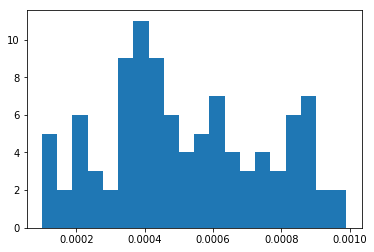

In [94]:
r = MESS.Region("watdo-tmp")
## Region params
r.set_param("project_dir", "/tmp")
r.set_param("generations", 0)
r.set_param("community_assembly_model", "neutral")
r.set_param("mutation_rate", 2.2e-8)
r.set_param("S_m", (500, 5000))
r.set_param("J", (1000, 2000))
r.set_param("m", (0.001, 0.01))
r.set_param("speciation_prob", (0.0001, 0.001))
plt.hist(MESS.util.sample_param_range(r.islands["Loc1"]._priors["speciation_prob"], nsamps=100), bins=20)

In [15]:
r = MESS.Region("watdo-tmp")
## Region params
r.set_param("project_dir", "/tmp")
r.set_param("generations", 0)
r.set_param("community_assembly_model", "neutral")
r.set_param("mutation_rate", 2.2e-8)
r.set_param("S_m", (500, 5000))
r.set_param("J", (1000, 2000))
r.set_param("m", (0.001, 0.01))
r.set_param("speciation_prob", (0.0001, 0.001))
r.run(sims=1)

    Generating 1 simulation(s).
  [####################] 100%  Finished 0 simulations    | 0:00:00 | 
 

(array([ 994.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1989.]),
 array([1000., 1400., 1800., 2200., 2600., 3000., 3400., 3800., 4200.,
        4600., 5000.]),
 <a list of 10 Patch objects>)

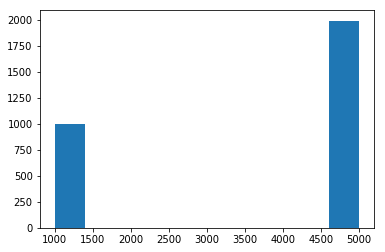

In [6]:
import pandas as pd
df = pd.read_csv("/home/isaac/Continuosity/MESS/analysis/full-parameter-estimation/SIMOUT.txt", sep="\t", header=0)
plt.hist(df["J"])